In [1]:
# @chhy

# loading all the necessary package


import numpy as np
import os, sys

import matplotlib.pyplot as plt
plt.ion()
from IPython.display import display, clear_output

sys.path.append('./Tool_box/')

from utilbcid_without_omega import C, M
from utilbcid_without_omega import generate_initial, generate_envelope, pre_align_rolls


## Single scan to test the parameters

In [2]:
# basic parameter, if you need more detailed setting, use the full version

shape = 128
scan = 6

Nj = 128

data_root = './Data/pick_up/'
data_file = data_root + '%i_%i.npz'%(scan, shape)
save_root = './Data/EMC_results/'
save_filename = save_root + 'corr_%i.npz'%scan
save_figname = save_root + 'corr_%i.png'%scan

fudge = 5e-3
support = 0.5

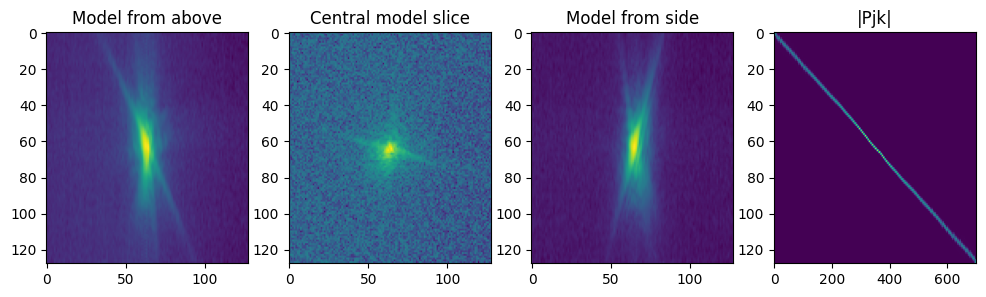

<Figure size 640x480 with 0 Axes>

In [3]:
# initialize the data and model 

data = np.load(data_file)['data']
print (data.shape)

envelope = generate_envelope(Nj, data.shape[-1], support=(support, 1, 1))
W = generate_initial(data, Nj)

fig, ax = plt.subplots(ncols=4, figsize=(12, 3))
titles = ['Model from above', 'Central model slice', 'Model from side', '|Pjk|']
errors = []

for i in range(50):
    print(i)
    W, Pjk, timing = M(W, data , beta=fudge,
                        force_continuity=6, nproc=8,
                        find_direction=(i>10))
    #[print(k, '%.3f'%v) for k, v in timing.items()]
    W, error = C(W, envelope) 
    errors.append(error)
    
    clear_output(wait=True)  # Clear the output to remove the old figures/text
    fig.clf()  # Clear the figure to refresh plots
    ax = fig.subplots(ncols=4)  # Re-create axes

    # Update plots
    #ax[0].imshow(np.log10(W[:, W.shape[1]//2, :]), cmap='viridis', aspect='auto')
    ax[0].imshow(np.log10(np.sum(W, axis = 1)), cmap='viridis', aspect='auto')
    ax[1].imshow(np.log10(W[W.shape[0]//2, :, :]), cmap='viridis', aspect='auto')
    ax[2].imshow(np.log10(np.sum(W, axis = 2)), cmap='viridis', aspect='auto')
    ax[3].imshow(np.abs(Pjk), aspect='auto', cmap='viridis')
    #ax[3].plot(errors)

    # Update titles
    for j, title in enumerate(titles):
        ax[j].set_title(title)

    # Redisplay the figure
    display(fig)  # Display the updated figure
    plt.pause(0.1)  # Pause to allow update before next iteration

plt.savefig(save_figname)


In [4]:
#save option
np.savez(save_filename,  W=W, Pjk=Pjk, support=support)

## Multiple process with same parameter

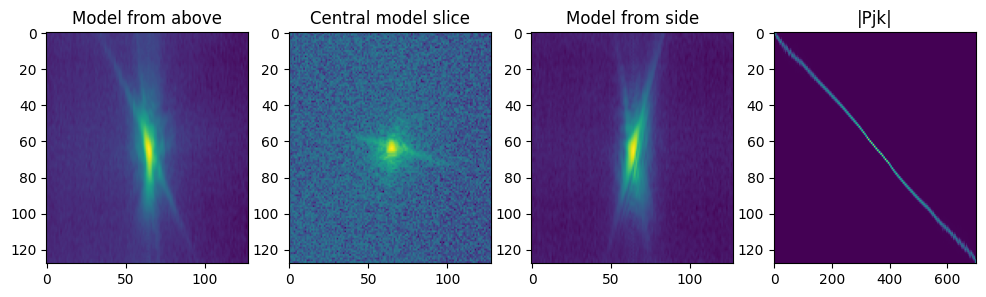

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:

shape = 128
scan_num = [24]

Nj = 128


fudge = 5e-3
support = 0.5
for scan in scan_num:
    data_root = './Data/pick_up/'
    data_file = data_root + '%i_%i.npz'%(scan, shape)
    save_root = './Data/EMC_results/'
    save_filename = save_root + 'corr_%i_05_5e3_128.npz'%scan
    save_figname = save_root + 'corr_%i.png'%scan

    data = np.load(data_file)['data']
    print (data.shape)
    
    envelope = generate_envelope(Nj, data.shape[-1], support=(support, 1, 1))
    W = generate_initial(data, Nj)
    
    fig, ax = plt.subplots(ncols=4, figsize=(12, 3))
    titles = ['Model from above', 'Central model slice', 'Model from side', '|Pjk|']
    errors = []
    
    for i in range(100):
        print(i)
        W, Pjk, timing = M(W, data , beta=fudge,
                            force_continuity=6, nproc=8,
                            find_direction=False)
        #[print(k, '%.3f'%v) for k, v in timing.items()]
        W, error = C(W, envelope) 
        errors.append(error)
        
        clear_output(wait=True)  # Clear the output to remove the old figures/text
        fig.clf()  # Clear the figure to refresh plots
        ax = fig.subplots(ncols=4)  # Re-create axes
    
        # Update plots
        #ax[0].imshow(np.log10(W[:, W.shape[1]//2, :]), cmap='viridis', aspect='auto')
        ax[0].imshow(np.log10(np.sum(W, axis = 1)), cmap='viridis', aspect='auto')
        ax[1].imshow(np.log10(W[W.shape[0]//2, :, :]), cmap='viridis', aspect='auto')
        ax[2].imshow(np.log10(np.sum(W, axis = 2)), cmap='viridis', aspect='auto')
        ax[3].imshow(np.abs(Pjk), aspect='auto', cmap='viridis')
        #ax[3].plot(errors)
    
        # Update titles
        for j, title in enumerate(titles):
            ax[j].set_title(title)
    
        # Redisplay the figure
        display(fig)  # Display the updated figure
        plt.pause(0.1)  # Pause to allow update before next iteration
    
        plt.savefig(save_figname)
    np.savez(save_filename,  W=W, Pjk=Pjk, support=support)

